In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heathcare-dataset-2.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df.shape

(3915, 12)

In [ ]:
# Frequncy distribution for categorical variables with value_counts method

cols1 = ['gender', 'hypertension', 'heart_disease', 'ever_married',
        'work_type', 'residence_type', 'smoking_status']
df1 = df[cols1]    

for col in df1.columns:
    print ("") 
    print ("---- %s ---" % col)
    print (df[col].value_counts(dropna=False, normalize=True))  


---- gender ---
Female    0.613538
Male      0.386207
Other     0.000255
Name: gender, dtype: float64

---- hypertension ---
0    0.891699
1    0.108301
Name: hypertension, dtype: float64

---- heart_disease ---
0    0.941507
1    0.058493
Name: heart_disease, dtype: float64

---- ever_married ---
Yes    0.794636
No     0.205364
Name: ever_married, dtype: float64

---- work_type ---
Private          0.655428
Self-employed    0.187995
Govt_job         0.156066
Never_worked     0.000511
Name: work_type, dtype: float64

---- residence_type ---
Urban    0.5106
Rural    0.4894
Name: residence_type, dtype: float64

---- smoking_status ---
never smoked       0.419668
formerly smoked    0.201277
Unknown            0.199234
smokes             0.179821
Name: smoking_status, dtype: float64


# 1. Convert a categorical variable to a numeric format
#### a. Convert a binary categorical variable to a numeric variable: Use pandas replace method
#### b. Convert a categorical target variable, use Sklearn’s LabelEncoder()  
      # While using LabelEncoder() is very quick and easy, it may not be the best choice: the order of our encoding is not exactly right. 
      # Also, we have to handle null values before being able to use it.
      # Another downside to LabelEncoder() is the fact that the documentation states it should be used for encoding target values (y) and not for the inputs (x).
 #### C. Convert a categorical input variables by using OrdinalEncoder(). We use this method.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
df['gender_encoded'] = OrdinalEncoder().fit_transform(df['gender'].values.reshape(-1,1))
df.groupby(['gender','gender_encoded']).size()

gender  gender_encoded
Female  0.0               2402
Male    1.0               1512
Other   2.0                  1
dtype: int64

In [ ]:
df['ever_married_encoded'] = OrdinalEncoder().fit_transform(df['ever_married'].values.reshape(-1,1))
df.groupby(['ever_married','ever_married_encoded']).size()

ever_married  ever_married_encoded
No            0.0                      804
Yes           1.0                     3111
dtype: int64

In [ ]:
# Another way to check the encoding:Use the pivot_table method 
df.pivot_table( index='ever_married', columns='ever_married_encoded', aggfunc='size')

ever_married_encoded,0.0,1.0
ever_married,,
No,804.0,NaN
Yes,NaN,3111.0


In [ ]:
# Use the crosstab method to check the encoding
pd.crosstab(index=df['ever_married'], columns=df['ever_married_encoded'])

ever_married_encoded,0.0,1.0
ever_married,,
No,804,0
Yes,0,3111


In [ ]:
df['work_type_encoded'] = OrdinalEncoder().fit_transform(df['work_type'].values.reshape(-1,1))
df.groupby(['work_type','work_type_encoded']).size()

work_type      work_type_encoded
Govt_job       0.0                   611
Never_worked   1.0                     2
Private        2.0                  2566
Self-employed  3.0                   736
dtype: int64

In [ ]:
df['residence_type_encoded'] = OrdinalEncoder().fit_transform(df['residence_type'].values.reshape(-1,1))
df.groupby(['residence_type','residence_type_encoded']).size()

residence_type  residence_type_encoded
Rural           0.0                       1916
Urban           1.0                       1999
dtype: int64

In [ ]:
df['smoking_status_encoded'] = OrdinalEncoder().fit_transform(df['smoking_status'].values.reshape(-1,1))
df.groupby(['smoking_status','smoking_status_encoded']).size()

smoking_status   smoking_status_encoded
Unknown          0.0                        780
formerly smoked  1.0                        788
never smoked     2.0                       1643
smokes           3.0                        704
dtype: int64

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_encoded', 'ever_married_encoded',
       'work_type_encoded', 'residence_type_encoded',
       'smoking_status_encoded'],
      dtype='object')

In [ ]:
df.drop(['id', 'gender', 'residence_type', 'ever_married','work_type', 'smoking_status'], axis=1, inplace=True)

In [ ]:
df.shape

(3915, 11)

In [ ]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_encoded', 'ever_married_encoded', 'work_type_encoded',
       'residence_type_encoded', 'smoking_status_encoded'],
      dtype='object')

# 2. Data Partition

In [ ]:
df.dtypes

NameError: ignored

In [ ]:

cols =['hypertension','heart_disease','stroke', 'gender_encoded','ever_married_encoded', 'work_type_encoded',
       'residence_type_encoded', 'smoking_status_encoded']
df[cols]= df[cols].astype('category')

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/heathcare-dataset-3.csv', index=False)

In [ ]:
df.dtypes

In [ ]:
data=df.drop(['stroke'],axis=1)
target = df['stroke']

In [ ]:
data.shape

In [ ]:
target.shape

In [ ]:
df['stroke'].value_counts()

In [ ]:
import imblearn
print(imblearn.__version__)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.333, random_state=2)
data_under, target_under=undersample.fit_resample(data, target)

In [ ]:
target_under.value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_under, target_under, test_size=0.5, random_state =42, stratify=target_under)

In [ ]:
X_train.shape

In [ ]:
(579+193)/2

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

# 3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

# Create a maximal tree and its accuracy
tree=DecisionTreeClassifier(random_state =0)
tree.fit(X_train,y_train)
print ("Accuracy(GINI) on training set:{:.5f}".format(tree.score(X_train, y_train)))
print ("Accuracy(GINI) on test set:{:.5f}".format(tree.score(X_test, y_test)))

Accuracy(GINI) on training set:1.00000
Accuracy(GINI) on test set:0.68912


In [ ]:
# Another way to get accuracy
model = tree.fit(X_train,y_train)
pred= model.predict(X_test)
print ("Accuracy(GINI) on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("Accuracy(GINI) on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy(GINI) on training set:1.00000
Accuracy(GINI) on test set:0.68912


In [ ]:
# Best Decision Tree based on Gini (Default)
# Decision Tree depth=5
tree2 = DecisionTreeClassifier(random_state=0, max_depth=5)    
model2 = tree2.fit(X_train, y_train)
pred2= model2.predict(X_test)

print("Accuracy(by GINI) on training set:{:.5f}".format(model2.score(X_train, y_train))) 
print("Accuracy(by GINI) on test set:{:.5f}".format(accuracy_score(y_test, pred2)))

Accuracy(by GINI) on training set:0.88342
Accuracy(by GINI) on test set:0.73316


In [ ]:
# Best Decision Tree based on Entropy
# DecisionTree depth=5

tree3 = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=5)
model3 = tree3.fit(X_train, y_train)
pred3= model3.predict(X_test)

print("Accuracy(by Entropy) on training set:{:.5f}".format(model3.score(X_train, y_train))) 
print("Accuracy(by Entropy) on test set:{:.5f}".format(accuracy_score(y_test, pred3)))

Accuracy(by Entropy) on training set:0.85492
Accuracy(by Entropy) on test set:0.73057


True Negative:247, False Negative:61, False Positive:43 True Positive:35
Accuracy: 0.73
Sensitivity(Recall): 0.36
Specificity: 0.85
Precision: 0.45
F1 score: 0.4


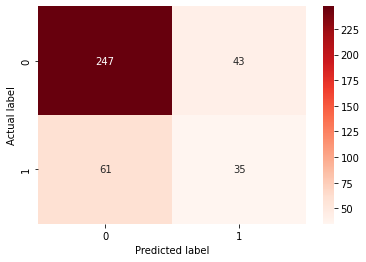

In [ ]:
# In this project, a false negative(a person with a prediction of a low stroke risk turns out be a stroke patient) is more critical than a false positive, 
# so sensitity(recall) that minimizes false negative or f1 score that reflects unbalanced sample can be more suitable measure. Thus, using the confusion matrix, calculate sensitivity and f1 score. 
import seaborn as sns
import matplotlib.pyplot as plt

CM = confusion_matrix(y_test, pred3)

TN = CM[0][0]
FN = CM[1][0]
FP = CM[0][1]
TP = CM[1][1]

print('True Negative:{}, False Negative:{}, False Positive:{} True Positive:{}'.format(TN, FN, FP, TP))
s=sns.heatmap(CM, annot=True, fmt = 'g' ,cmap=plt.cm.Reds)
s.set(xlabel = 'Predicted label', ylabel ='Actual label')

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:",round(ACC, 2))

# Sensitivity, recall, true positive rate, or hit rate
TPR = (TP/(TP+FN))
print("Sensitivity(Recall):",round(TPR, 2))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("Specificity:",round(TNR, 2))

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision:",round(PPV, 2))

# F1 score
F1= (2*TP)/(2*TP+FP+FN)
print("F1 score:",round(F1, 2))

In [ ]:
# Find an optimal tree by using GridSearchCV

from sklearn.model_selection import GridSearchCV
params ={'criterion':['gini','entropy'], 'max_depth': range(1,21), 'min_samples_leaf':range (5,20)}
grid_tree=GridSearchCV(tree, param_grid= params, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_tree.fit(X_train, y_train)
print("GridSearchCV Max Accuracy on training set:{:.5f}".format(grid_tree.best_score_))
print("GridSearchCV best parameters", (grid_tree.best_params_))

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
GridSearchCV Max Accuracy on training set:0.80566
GridSearchCV best parameters {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 6}


In [ ]:
best_clf=grid_tree.best_estimator_
pred4 = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred4)))
print("Recall on test set:{:.5f}".format(recall_score(y_test, pred4)))
print("F1 score on test set:{:.5f}".format(f1_score(y_test, pred4)))

Accuracy on test set:0.73834
Recall on test set:0.38542
F1 score on test set:0.42286


In [ ]:
print(confusion_matrix(y_test, pred4))

[[248  42]
 [ 59  37]]


In [ ]:
CM = confusion_matrix(y_test, pred4)

TN = CM[0][0]
FN = CM[1][0]
FP = CM[0][1]
TP = CM[1][1]

print('True Negative:{}, False Negative:{}, False Positive:{} True Positive:{}'.format(TN, FN, FP, TP))
s=sns.heatmap(CM, annot=True, fmt = 'g' ,cmap=plt.cm.Reds)
s.set(xlabel = 'Predicted label', ylabel ='Actual label')

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:",round(ACC, 2))

# Sensitivity, recall, true positive rate, or hit rate
TPR = (TP/(TP+FN))
print("Sensitivity(Recall):",round(TPR, 2))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("Specificity:",round(TNR, 2))

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision:",round(PPV, 2))

# F1 score
F1= (2*TP)/(2*TP+FP+FN)
print("F1 score:",round(F1, 2))

NameError: ignored

In [ ]:
print(classification_report(y_test, pred4))

In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_prob=best_clf.predict_proba(X_test)[:,1]
ROC_AUC=roc_auc_score(y_test, y_pred_prob)
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

In [ ]:
#fpr = False Positive Rate, tpr = True Positive Rate
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=y_pred_prob)
plt.figure(figsize = (6,6))
plt.plot(fpr, tpr, label ="Best Decision Tree AUC =" + "%.4f"%ROC_AUC)
plt.plot([-0.02,1.02], [-0.02,1.02], color="gray", linestyle=':', label="Random Model")
plt.margins(0)
plt.legend(loc=4)
plt.xlabel("fpr:1-Specificity")
plt.ylabel("tpr:Sensititivy")
plt.title("ROC Curve", weight='bold')
plt.show()

In [ ]:
print("Feature importance")
print(best_clf.feature_importances_)

In [ ]:
feature_names=list(data.columns)
dft=pd.DataFrame(np.round(best_clf.feature_importances_, 4), index=feature_names, columns =["Feature_importances"])
dft1=dft.sort_values(by="Feature_importances", ascending=False)                 
dft1

In [ ]:
import seaborn as sns
ax=sns.barplot(y=dft1.index, x="Feature_importances", data =dft1)
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1),
                xytext=(5, 10), textcoords='offset points')

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig =plt.figure(figsize =(20,10))
_= tree.plot_tree(best_clf, feature_names=list(data.columns), filled=True)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(best_clf, out_file="tree.dot", feature_names =list(data.columns), impurity=False, filled=True)
with open("tree.dot") as f:
  dot_graph=f.read()
display(graphviz.Source(dot_graph))

# 4. Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

# Create a Random Forest model (Default: no limit on tree depth)

rf=RandomForestClassifier(n_estimators=100, random_state=0)
model5=rf.fit(X_train, y_train)
pred5=model5.predict(X_test)
print("Random Forrest Accuracy on training set:{:.5f}".format(model5.score(X_train, y_train)))
print("Random Forrest Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred5)))

NameError: ignored

In [ ]:
# Check the out of bag(OOB) accuracy by making oob-score True

rf=RandomForestClassifier(n_estimators=100,  oob_score=True, random_state=0)
model5=rf.fit(X_train, y_train)
pred5=model5.predict(X_test)
print("Random Forrest Accuracy on training set:{:.5f}".format(model5.score(X_train, y_train)))
print("Random Forrest Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred5)))
print("Random Forrest Accuracy on out of bag set:{:.5f}".format(rf.oob_score_))

In [ ]:
# Find the optimal forrest

params ={'n_estimators':[100,200], 'max_depth': range(3,10)}
grid_rf=GridSearchCV(rf, param_grid= params, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)
print("GridSearchCV Max Accuracy:{:.5f}".format(grid_rf.best_score_))
print("GridSearchCV best parameters", (grid_rf.best_params_))

In [ ]:
best_clf2 = grid_rf.best_estimator_
pred6 = best_clf2.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred6)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf2.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

In [ ]:
CM = confusion_matrix(y_test, pred6)


TN = CM[0][0]
FN = CM[1][0]
FP = CM[0][1]
TP = CM[1][1]

print('True Negative:{}, False Negative:{}, False Positive:{} True Positive:{}'.format(TN, FN, FP, TP))
s=sns.heatmap(CM, annot=True, fmt = 'g' ,cmap=plt.cm.Reds)
s.set(xlabel = 'Predicted label', ylabel ='Actual label')

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:",round(ACC, 2))

# Sensitivity, recall, true positive rate, or hit rate
TPR = (TP/(TP+FN))
print("Sensitivity(Recall):",round(TPR, 2))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("Specificity:",round(TNR, 2))

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision:",round(PPV, 2))

# F1 score
F1= (2*TP)/(2*TP+FP+FN)
print("F1 score:",round(F1, 2))

In [ ]:
print ("Feature importances:") 
print (best_clf2.feature_importances_) 

In [ ]:
feature_names=list(data.columns)
dft=pd.DataFrame(np.round(best_clf2.feature_importances_, 4), index=feature_names, columns =["Feature_importances"])
dft1=dft.sort_values(by="Feature_importances", ascending=False)                 
dft1

In [ ]:
import seaborn as sns
ax=sns.barplot(y=dft1.index, x="Feature_importances", data =dft1)
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1),
                xytext=(5, 10), textcoords='offset points')

#5. Gradient Boosting Model

In [ ]:
# Gradient Boosting Model (Default).
from sklearn.ensemble import GradientBoostingClassifier 
gr = GradientBoostingClassifier(random_state = 0) 
model7 = gr.fit(X_train, y_train)
pred7 = model7.predict(X_test) 

print ("grbt Accuracy on training set:{:.5f}".format(model7.score(X_train, y_train))) 
print ("grbt Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred7)))

grbt Accuracy on training set:0.95078
grbt Accuracy on test set:0.73834


In [ ]:
# Be careful: Gradient Boosting takes a long time to run

params = {'max_depth': range( 1, 8), 'n_estimators':[100,200],'learning_rate':[0.01, 0.1, 1]}

grid_gr = GridSearchCV(model7, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_gr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_gr.best_score_))
print("GridSearchCV best parameter:", (grid_gr.best_params_)) 


GridSearchCV max accuracy:0.80569
GridSearchCV best parameter: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200}


In [ ]:
best_clf3 = grid_gr.best_estimator_
pred8 = best_clf3.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred8)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf3.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.75389
ROC AUC on test set:0.77502


True Negative:260, False Negative:65, False Positive:30 True Positive:31
Accuracy: 0.75
Sensitivity(Recall): 0.32
Specificity: 0.9
Precision: 0.51
F1 score: 0.39


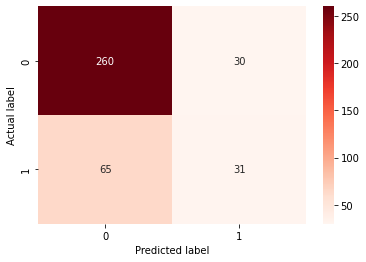

In [ ]:
CM = confusion_matrix(y_test, pred8)

TN = CM[0][0]
FN = CM[1][0]
FP = CM[0][1]
TP = CM[1][1]

print('True Negative:{}, False Negative:{}, False Positive:{} True Positive:{}'.format(TN, FN, FP, TP))
s=sns.heatmap(CM, annot=True, fmt = 'g' ,cmap=plt.cm.Reds)
s.set(xlabel = 'Predicted label', ylabel ='Actual label')


# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:",round(ACC, 2))

# Sensitivity, recall, true positive rate, or hit rate
TPR = (TP/(TP+FN))
print("Sensitivity(Recall):",round(TPR, 2))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("Specificity:",round(TNR, 2))

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision:",round(PPV, 2))

# F1 score
F1= (2*TP)/(2*TP+FP+FN)
print("F1 score:",round(F1, 2))

# Extra: Comparing multiple models

# Plotting Confusion Matrix of Decision Tree, Random Forrest, Gradient Boosting

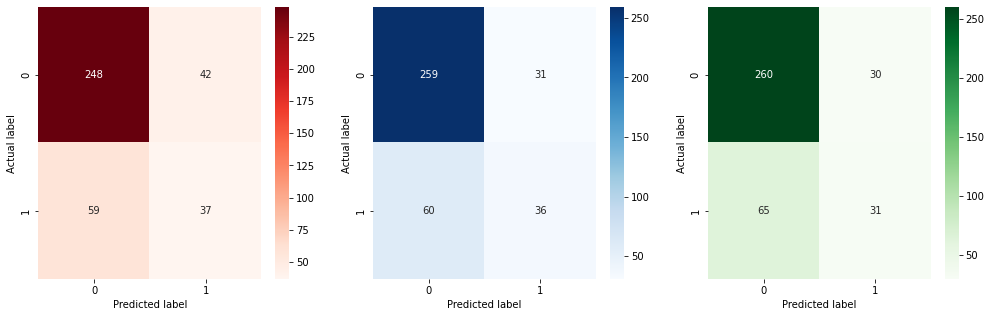

In [ ]:
fig=plt.figure(figsize=(17,5),facecolor='white')
gs=fig.add_gridspec(1,3)
ax=[None for i in range(3)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[0,2])

cm_DT = confusion_matrix(y_test, pred4)
sns.heatmap(cm_DT, annot=True, ax = ax[0], fmt = 'g' ,cmap=plt.cm.Reds)

cm_RF = confusion_matrix(y_test,pred6)
sns.heatmap(cm_RF, annot=True, ax = ax[1], fmt = 'g' ,cmap=plt.cm.Blues)

cm_GB = confusion_matrix(y_test,pred8)
sns.heatmap(cm_GB, annot=True, ax = ax[2], fmt = 'g' ,cmap=plt.cm.Greens)
title=['DT','RF','GB']

for i in range(3):
    #ax[i].grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(5,10))
    ax[i].set_xlabel('Predicted label')
    ax[i].set_ylabel('Actual label')
    #ax[i].text(title[i])
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)

AUC score for DT, RF and GBoost 0.7488146551724137 0.7742097701149426 0.775017959770115


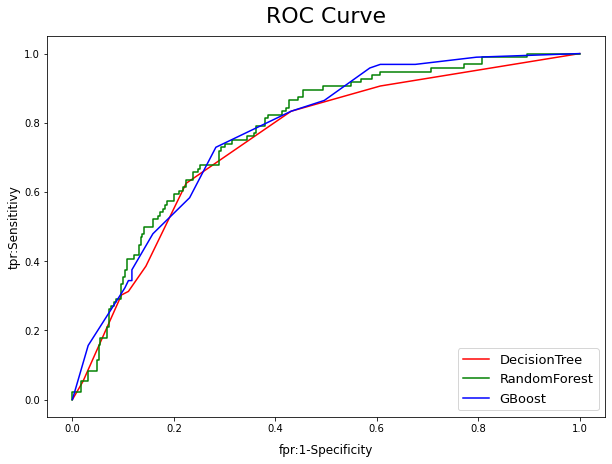

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

#fpr = False Positive Rate, tpr = True Positive Rate

y_pred_prob1 = best_clf.predict_proba(X_test)[:,1]  # Best decision tree model  
y_pred_prob2 = best_clf2.predict_proba(X_test)[:,1] # Best forrest model
y_pred_prob3 = best_clf3.predict_proba(X_test)[:,1] # Best gradient boosting model


fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_prob1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_prob2)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_prob3)


auc_score1 = roc_auc_score(y_test, y_pred_prob1)
auc_score2 = roc_auc_score(y_test, y_pred_prob2)
auc_score3 = roc_auc_score(y_test, y_pred_prob3)


print('AUC score for DT, RF and GBoost',auc_score1, auc_score2,auc_score3 )

plt.figure(figsize=(10,7)) #to set the size of the figure generated

plt.plot(fpr1, tpr1,color='red', label='DecisionTree')
plt.plot(fpr2, tpr2,color='green', label='RandomForest')
plt.plot(fpr3, tpr3,color='blue', label='GBoost')
plt.xlabel('fpr:1-Specificity',fontsize=12,labelpad =10) #Label for x axis
plt.ylabel('tpr:Sensititivy',fontsize=12) #Label for y axis

plt.title('ROC Curve',fontsize=22).set_position([.5, 1.02]) #Plot title
plt.legend(loc="lower right",fontsize=13)
plt.show()